## Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# The new set without training with the cost estimates
agent_a = '0905_Shakespeare_supervisory_control_simulation_results.csv'
agent_b = '0907_Norman_supervisory_control_simulation_results.csv'
agent_c = '0905_Olaf_supervisory_control_simulation_results.csv'

# 1. Reading the CSV files
df_a = pd.read_csv(agent_a)
df_b = pd.read_csv(agent_b)
df_c = pd.read_csv(agent_c)

# 2. Combining the Data
combined_df = pd.concat([df_a, df_b, df_c], ignore_index=True)

def extract_data_for_agent(df, col_name, event_levels):
    data = []
    for level in event_levels:
        subset = df[df['event_update_level'] == level][col_name].tolist()
        data.append(subset)
    return data

## Number of Attention Switches

Plot saved as study1_numattentionshifts.png


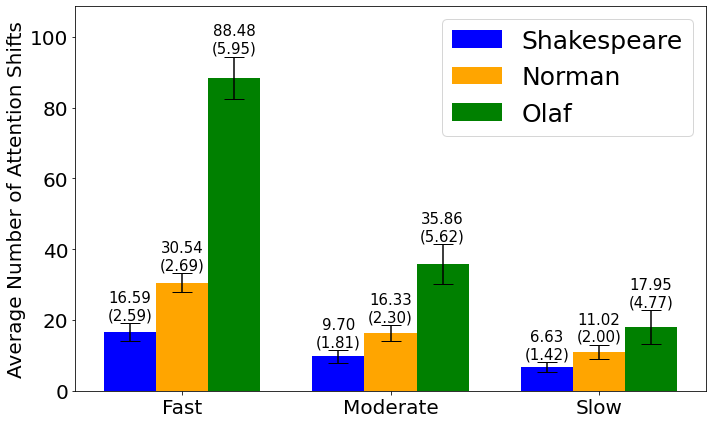

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to adjust y-limit
def adjust_ylim(ax, means, sems):
    y_max = max([mean + sem for mean, sem in zip(means, sems)])
    ax.set_ylim(0, y_max * 1.15)  # Adding a bit of margin to the top

event_levels = combined_df['event_update_level'].unique()
data_a = extract_data_for_agent(df_a, 'num_attention_switches', event_levels)
data_b = extract_data_for_agent(df_b, 'num_attention_switches', event_levels)
data_c = extract_data_for_agent(df_c, 'num_attention_switches', event_levels)

x_labels = ["Fast", "Moderate", "Slow"]
x = np.arange(len(x_labels))

def calculate_mean_and_sem(data):
    means = [np.mean(d) for d in data]
    sems = [np.std(d) / 1 for d in data]
    return means, sems

means_a, sem_a = calculate_mean_and_sem(data_a)
means_b, sem_b = calculate_mean_and_sem(data_b)
means_c, sem_c = calculate_mean_and_sem(data_c)

bar_width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['blue', 'orange', 'green']

# Add annotations on top of the bars
def annotate_bars(ax, rects, means, sems):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(f"{means[i]:.2f}\n({sems[i]:.2f})", 
                   (rect.get_x() + rect.get_width() / 2., height + sems[i] + 0.14),
                   ha='center', va='bottom', fontsize=15)

rects_a = ax.bar(x - bar_width, means_a, yerr=sem_a, color=colors[0], width=bar_width, label='Shakespeare', capsize=10)
rects_b = ax.bar(x, means_b, yerr=sem_b, color=colors[1], width=bar_width, label='Norman', capsize=10)
rects_c = ax.bar(x + bar_width, means_c, yerr=sem_c, color=colors[2], width=bar_width, label='Olaf', capsize=10)

annotate_bars(ax, rects_a, means_a, sem_a)
annotate_bars(ax, rects_b, means_b, sem_b)
annotate_bars(ax, rects_c, means_c, sem_c)

# Adjust y-axis limits
all_means = means_a + means_b + means_c
all_sems = sem_a + sem_b + sem_c
adjust_ylim(ax, all_means, all_sems)

# ax.set_title("Number of Attention Switch Across Different Walking Speed", fontsize=14, fontweight='bold')
# ax.set_xlabel("Walking Speed", fontsize=20)
ax.set_ylabel("Average Number of Attention Shifts", fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=20)
ax.tick_params(axis='y', labelsize=20)  # Adjust the fontsize as desired for y-axis
ax.legend(fontsize=25)

plt.tight_layout()

# Save the plot to a local file
# output_filename = 'numattentionshifts.png'
output_filename = 'study1_numattentionshifts.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f'Plot saved as {output_filename}')

plt.show()

In [3]:
# 1. Average number of attention switches for each agent across the three walking speeds.
mean_attention_switches_a = np.mean(means_a)
std_attention_switches_a = np.mean(sem_a)  # Note: since sem is actually std, we're just taking the mean of the stds here

mean_attention_switches_b = np.mean(means_b)
std_attention_switches_b = np.mean(sem_b)

mean_attention_switches_c = np.mean(means_c)
std_attention_switches_c = np.mean(sem_c)

print(f"Shakespeare: {mean_attention_switches_a:.2f} ± {std_attention_switches_a:.2f}")
print(f"Norman: {mean_attention_switches_b:.2f} ± {std_attention_switches_b:.2f}")
print(f"Olaf: {mean_attention_switches_c:.2f} ± {std_attention_switches_c:.2f}")

print("\n")

# 2. Average number of attention switches across the three agents for each walking speed.
means_fast = [means_a[0], means_b[0], means_c[0]]
means_moderate = [means_a[1], means_b[1], means_c[1]]
means_slow = [means_a[2], means_b[2], means_c[2]]

stds_fast = [sem_a[0], sem_b[0], sem_c[0]]
stds_moderate = [sem_a[1], sem_b[1], sem_c[1]]
stds_slow = [sem_a[2], sem_b[2], sem_c[2]]

mean_fast = np.mean(means_fast)
std_fast = np.mean(stds_fast)

mean_moderate = np.mean(means_moderate)
std_moderate = np.mean(stds_moderate)

mean_slow = np.mean(means_slow)
std_slow = np.mean(stds_slow)

print(f"Fast: {mean_fast:.2f} ± {std_fast:.2f}")
print(f"Moderate: {mean_moderate:.2f} ± {std_moderate:.2f}")
print(f"Slow: {mean_slow:.2f} ± {std_slow:.2f}")


Shakespeare: 10.97 ± 1.94
Norman: 19.30 ± 2.33
Olaf: 47.43 ± 5.44


Fast: 45.20 ± 3.74
Moderate: 20.63 ± 3.24
Slow: 11.87 ± 2.73


## Reading Speed

Plot saved as study1_readingspeed.png


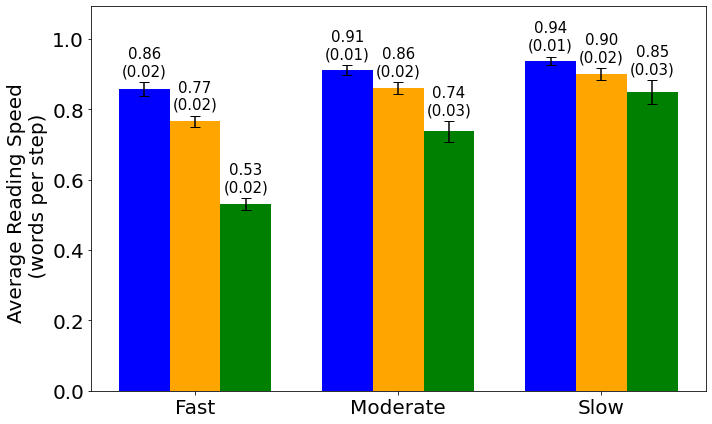

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the combined_df and extract_data_for_agent() function is already defined

event_levels = combined_df['event_update_level'].unique()
data_a = extract_data_for_agent(df_a, 'reading_speed', event_levels)
data_b = extract_data_for_agent(df_b, 'reading_speed', event_levels)
data_c = extract_data_for_agent(df_c, 'reading_speed', event_levels)

x_labels = ["Fast", "Moderate", "Slow"]
x = np.arange(len(x_labels))

def calculate_mean_and_sem(data):
    means = [np.mean(d) for d in data]
    sems = [np.std(d) / 1 for d in data]
    return means, sems

# Function to adjust y-limit
def adjust_ylim(ax, means, sems):
    y_max = max([mean + sem for mean, sem in zip(means, sems)])
    ax.set_ylim(0, y_max * 1.15)  # Adding a bit of margin to the top

means_a, sem_a = calculate_mean_and_sem(data_a)
means_b, sem_b = calculate_mean_and_sem(data_b)
means_c, sem_c = calculate_mean_and_sem(data_c)

bar_width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['blue', 'orange', 'green']

# Add annotations on top of the bars
def annotate_bars(ax, rects, means, sems):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(f"{means[i]:.2f}\n({sems[i]:.2f})", 
                   (rect.get_x() + rect.get_width() / 2., height + sems[i] + 0.01),
                   ha='center', va='bottom', fontsize=15)

rects_a = ax.bar(x - bar_width, means_a, yerr=sem_a, color=colors[0], width=bar_width, label='Shakespeare', capsize=5)
rects_b = ax.bar(x, means_b, yerr=sem_b, color=colors[1], width=bar_width, label='Norman', capsize=5)
rects_c = ax.bar(x + bar_width, means_c, yerr=sem_c, color=colors[2], width=bar_width, label='Olaf', capsize=5)

annotate_bars(ax, rects_a, means_a, sem_a)
annotate_bars(ax, rects_b, means_b, sem_b)
annotate_bars(ax, rects_c, means_c, sem_c)

# Adjust y-axis limits
all_means = means_a + means_b + means_c
all_sems = sem_a + sem_b + sem_c
adjust_ylim(ax, all_means, all_sems)

# ax.set_xlabel("Walking Speed", fontsize=20)
ax.set_ylabel("Average Reading Speed \n (words per step)", fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=20)
ax.tick_params(axis='y', labelsize=20)  # Adjust the fontsize as desired for y-axis
# ax.legend(fontsize=20)

plt.tight_layout()

# Save the plot to a local file
output_filename = 'study1_readingspeed.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f'Plot saved as {output_filename}')

plt.show()

In [5]:
# 1. Average reading speed for each agent across the three walking speeds.
mean_reading_speed_a = np.mean(means_a)
std_reading_speed_a = np.mean(sem_a)  # Remember: here sem is actually std, so we're just taking the mean of the stds

mean_reading_speed_b = np.mean(means_b)
std_reading_speed_b = np.mean(sem_b)

mean_reading_speed_c = np.mean(means_c)
std_reading_speed_c = np.mean(sem_c)

print(f"Shakespeare: {mean_reading_speed_a:.2f} words/step ± {std_reading_speed_a:.2f}")
print(f"Norman: {mean_reading_speed_b:.2f} words/step ± {std_reading_speed_b:.2f}")
print(f"Olaf: {mean_reading_speed_c:.2f} words/step ± {std_reading_speed_c:.2f}")

print("\n")

# 2. Average reading speed across the three agents for each walking speed.
means_fast = [means_a[0], means_b[0], means_c[0]]
means_moderate = [means_a[1], means_b[1], means_c[1]]
means_slow = [means_a[2], means_b[2], means_c[2]]

stds_fast = [sem_a[0], sem_b[0], sem_c[0]]
stds_moderate = [sem_a[1], sem_b[1], sem_c[1]]
stds_slow = [sem_a[2], sem_b[2], sem_c[2]]

mean_fast = np.mean(means_fast)
std_fast = np.mean(stds_fast)

mean_moderate = np.mean(means_moderate)
std_moderate = np.mean(stds_moderate)

mean_slow = np.mean(means_slow)
std_slow = np.mean(stds_slow)

print(f"Fast: {mean_fast:.2f} words/step ± {std_fast:.2f}")
print(f"Moderate: {mean_moderate:.2f} words/step ± {std_moderate:.2f}")
print(f"Slow: {mean_slow:.2f} words/step ± {std_slow:.2f}")


Shakespeare: 0.90 words/step ± 0.02
Norman: 0.84 words/step ± 0.02
Olaf: 0.71 words/step ± 0.03


Fast: 0.72 words/step ± 0.02
Moderate: 0.84 words/step ± 0.02
Slow: 0.90 words/step ± 0.02


In [6]:
means_a, sem_a

([0.8581646666666668, 0.911819, 0.9379913333333334],
 [0.019059145264733724, 0.014891653333327344, 0.012361318358312591])

## Walking Performance

<ipython-input-7-b610c2d3de96>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.2f}'.format(100 * val) for val in y_values])


Plot saved as study1_walkingerrorrate.png


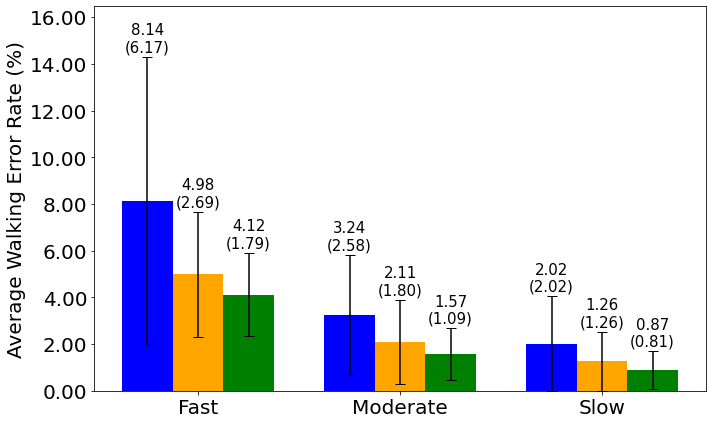

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# Assuming the combined_df and extract_data_for_agent() function is already defined
event_levels = combined_df['event_update_level'].unique()
data_a = extract_data_for_agent(df_a, 'inform_loss', event_levels)
data_b = extract_data_for_agent(df_b, 'inform_loss', event_levels)
data_c = extract_data_for_agent(df_c, 'inform_loss', event_levels)

x_labels = ["Fast", "Moderate", "Slow"]
x = np.arange(len(x_labels))

# Adjusted to calculate STD
def calculate_normalized_mean_and_std(data, total_steps):
    means = [np.mean(d) / total_steps for d in data]
    stds = [np.std(d) / total_steps for d in data]
    return means, stds

# Extract total steps for each dataframe
total_steps_a = df_a['total_steps'].iloc[0]
total_steps_b = df_b['total_steps'].iloc[0]
total_steps_c = df_c['total_steps'].iloc[0]

# # Revised mean and std: on the time steps walk on the correct lane
# def calculate_normalized_mean_and_std(data_loss, data_total):
#     means = [np.mean((total - loss) / 1) for total, loss in zip(data_total, data_loss)]
#     stds = [np.std((total - loss) / 1) for total, loss in zip(data_total, data_loss)]
#     return means, stds

# total_steps_a = [df_a['total_steps'].iloc[0]] * len(data_a)
# total_steps_b = [df_b['total_steps'].iloc[0]] * len(data_b)
# total_steps_c = [df_c['total_steps'].iloc[0]] * len(data_c)

means_a, std_a = calculate_normalized_mean_and_std(data_a, total_steps_a)
means_b, std_b = calculate_normalized_mean_and_std(data_b, total_steps_b)
means_c, std_c = calculate_normalized_mean_and_std(data_c, total_steps_c)

# Adjust y-limit function
def adjust_ylim(ax, means, stds):
    y_max = max([mean + std for mean, std in zip(means, stds)])
    ax.set_ylim(0, y_max * 1.15)

bar_width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['blue', 'orange', 'green']

# Annotate bars with means and STD values
def annotate_bars(ax, rects, means, stds):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(f"{100*means[i]:.2f}\n({100*stds[i]:.2f})", 
                   (rect.get_x() + rect.get_width() / 2., height + stds[i] + 0.001),
                   ha='center', va='bottom', fontsize=15)

rects_a = ax.bar(x - bar_width, means_a, yerr=std_a, color=colors[0], width=bar_width, label='Shakespeare', capsize=5)
rects_b = ax.bar(x, means_b, yerr=std_b, color=colors[1], width=bar_width, label='Norman', capsize=5)
rects_c = ax.bar(x + bar_width, means_c, yerr=std_c, color=colors[2], width=bar_width, label='Olaf', capsize=5)

annotate_bars(ax, rects_a, means_a, std_a)
annotate_bars(ax, rects_b, means_b, std_b)
annotate_bars(ax, rects_c, means_c, std_c)

# Adjust y-axis limits
all_means = means_a + means_b + means_c
all_stds = std_a + std_b + std_c
adjust_ylim(ax, all_means, all_stds)

# Adjust the ytick labels
y_values = ax.get_yticks()
ax.set_yticklabels(['{:.2f}'.format(100 * val) for val in y_values])
ax.yaxis.set_major_locator(FixedLocator(y_values))

# ax.set_title("Inform Loss Across Different Background Event Update Levels", fontsize=14, fontweight='bold')
# ax.set_xlabel("Walking Speed", fontsize=20)
ax.set_ylabel("Average Walking Error Rate (%)", fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=20)
ax.tick_params(axis='y', labelsize=20)  # Adjust the fontsize as desired for y-axis

# ax.legend(fontsize=20)

plt.tight_layout()

# Save the plot to a local file
# output_filename = 'walkingerrorrate.png'
output_filename = 'study1_walkingerrorrate.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f'Plot saved as {output_filename}')
plt.show()

In [8]:
# Print some results
mean_a_total = np.mean(means_a)
std_a_rms = np.sqrt(np.mean(np.array(std_a)**2))

print(f"Shakespeare's Average Walking Error Rate Across Three Conditions:")
print(f"Mean: {100*mean_a_total:.2f}%")
print(f"Standard Deviation (RMS): {100*std_a_rms:.2f}%")

mean_b_total = np.mean(means_b)
std_b_rms = np.sqrt(np.mean(np.array(std_b)**2))

print(f"Norman's Average Walking Error Rate Across Three Conditions:")
print(f"Mean: {100*mean_b_total:.2f}%")
print(f"Standard Deviation (RMS): {100*std_b_rms:.2f}%")

mean_c_total = np.mean(means_c)
std_c_rms = np.sqrt(np.mean(np.array(std_c)**2))

print(f"Olaf's Average Walking Error Rate Across Three Conditions:")
print(f"Mean: {100*mean_c_total:.2f}%")
print(f"Standard Deviation (RMS): {100*std_c_rms:.2f}%")

mean_fast = np.mean([means_a[0], means_b[0], means_c[0]])
std_fast_rms = np.sqrt(np.mean([std_a[0]**2, std_b[0]**2, std_c[0]**2]))

print(f"Average Walking Error Rate for Fast Speed Across Three Agents:")
print(f"Mean: {100*mean_fast:.2f}%")
print(f"Standard Deviation (RMS): {100*std_fast_rms:.2f}%")

mean_moderate = np.mean([means_a[1], means_b[1], means_c[1]])
std_moderate_rms = np.sqrt(np.mean([std_a[1]**2, std_b[1]**2, std_c[1]**2]))

print(f"Average Walking Error Rate for Moderate Speed Across Three Agents:")
print(f"Mean: {100*mean_moderate:.2f}%")
print(f"Standard Deviation (RMS): {100*std_moderate_rms:.2f}%")

mean_slow = np.mean([means_a[2], means_b[2], means_c[2]])
std_slow_rms = np.sqrt(np.mean([std_a[2]**2, std_b[2]**2, std_c[2]**2]))

print(f"Average Walking Error Rate for Slow Speed Across Three Agents:")
print(f"Mean: {100*mean_slow:.2f}%")
print(f"Standard Deviation (RMS): {100*std_slow_rms:.2f}%")

Shakespeare's Average Walking Error Rate Across Three Conditions:
Mean: 4.47%
Standard Deviation (RMS): 4.03%
Norman's Average Walking Error Rate Across Three Conditions:
Mean: 2.78%
Standard Deviation (RMS): 2.00%
Olaf's Average Walking Error Rate Across Three Conditions:
Mean: 2.19%
Standard Deviation (RMS): 1.30%
Average Walking Error Rate for Fast Speed Across Three Agents:
Mean: 5.75%
Standard Deviation (RMS): 4.02%
Average Walking Error Rate for Moderate Speed Across Three Agents:
Mean: 2.31%
Standard Deviation (RMS): 1.92%
Average Walking Error Rate for Slow Speed Across Three Agents:
Mean: 1.38%
Standard Deviation (RMS): 1.45%


## Attention Switch Moment Margin vs Middle

Plot saved as study1_readinginterruptionpoints.png


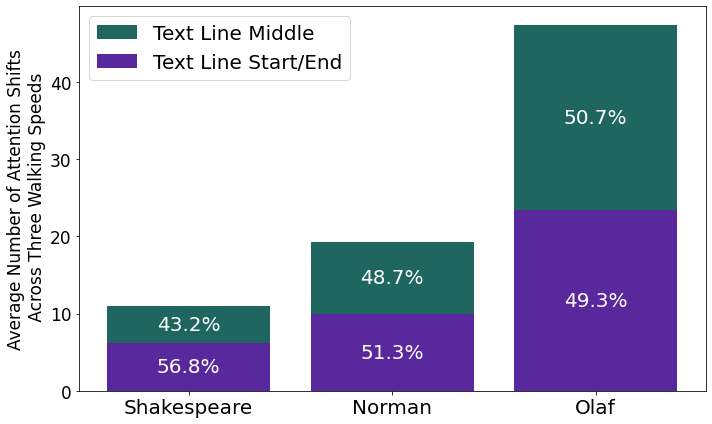

In [9]:
import matplotlib.pyplot as plt

def extract_average_attention_data(df):
    avg_total_attention = df['num_attention_switches'].mean()
    avg_margin_attention = df['num_attention_switches_margins'].mean()
    avg_middle_attention = df['num_attention_switches_middle'].mean()
    
    margin_percentage = (avg_margin_attention / avg_total_attention) * 100
    middle_percentage = (avg_middle_attention / avg_total_attention) * 100
    
    return avg_total_attention, avg_margin_attention, avg_middle_attention, margin_percentage, middle_percentage

# Extracting data from dataframes
avg_total_attention_a, avg_margin_attention_a, avg_middle_attention_a, margin_percentage_a, middle_percentage_a = extract_average_attention_data(df_a)
avg_total_attention_b, avg_margin_attention_b, avg_middle_attention_b, margin_percentage_b, middle_percentage_b = extract_average_attention_data(df_b)
avg_total_attention_c, avg_margin_attention_c, avg_middle_attention_c, margin_percentage_c, middle_percentage_c = extract_average_attention_data(df_c)

labels = ['Shakespeare', 'Norman', 'Olaf']
avg_total_attentions = [avg_total_attention_a, avg_total_attention_b, avg_total_attention_c]
avg_margin_attentions = [avg_margin_attention_a, avg_margin_attention_b, avg_margin_attention_c]
avg_middle_attentions = [avg_middle_attention_a, avg_middle_attention_b, avg_middle_attention_c]

margin_percentages = [margin_percentage_a, margin_percentage_b, margin_percentage_c]
middle_percentages = [middle_percentage_a, middle_percentage_b, middle_percentage_c]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars_middle = ax.bar(labels, avg_middle_attentions, bottom=avg_margin_attentions, label='Text Line Middle', color=(0.12, 0.4, 0.376))
bars_margin = ax.bar(labels, avg_margin_attentions, label='Text Line Start/End', color=(0.353, 0.157, 0.617))


# Annotating with percentages
for i, bar in enumerate(bars_margin):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height/2., 
            f'{margin_percentages[i]:.1f}%', ha='center', va='center', color='white', fontsize=20)
    
for i, bar in enumerate(bars_middle):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., avg_margin_attentions[i] + height/2., 
            f'{middle_percentages[i]:.1f}%', ha='center', va='center', color='white', fontsize=20)

# ax.set_xlabel("Agent's Name", fontsize=25)
ax.set_ylabel('Average Number of Attention Shifts\n Across Three Walking Speeds', fontsize=17)
# ax.set_title('Average Attention Switch Interruption Position Distribution by Sentence Position')
ax.set_xticks(np.arange(len(labels)))  # Set tick locations
ax.set_xticklabels(labels, fontsize=20)  # Adjust fontsize as desired
ax.tick_params(axis='y', labelsize=17)  # Adjust the fontsize as desired for y-axis
ax.legend(loc='upper left', fontsize=20)

plt.tight_layout()

# Save the plot to a local file
# output_filename = 'readinginterruptionpoints.png'
output_filename = 'study1_readinginterruptionpoints.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f'Plot saved as {output_filename}')
plt.show()


## Trajectory

Plot saved as study1_mbm_attentionshifts.png


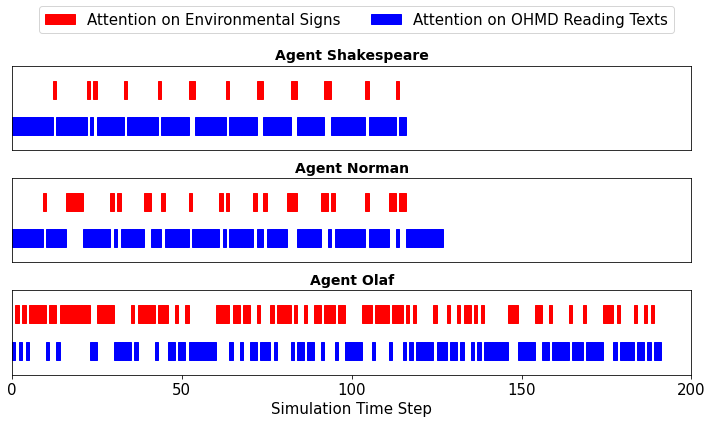

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import ast
from matplotlib.patches import Patch

# 1. Reading the CSV files
df_a = pd.read_csv(agent_a)
df_b = pd.read_csv(agent_b)
df_c = pd.read_csv(agent_c)

colour_for_signs = 'red' 
colour_for_ohmd = 'blue'
max_episode_length = 200

# Convert attention_switches_time_steps_list from string to list
for df in [df_a, df_b, df_c]:
    df['attention_switches_time_steps_list'] = df['attention_switches_time_steps_list'].apply(lambda x: ast.literal_eval(x))

def plot_attention_switches(df, ax, title, event_level):
    
    # Filter the dataframe by the given event update level and then select a row
    filtered_df = df[df['event_update_level'] == event_level]
    if filtered_df.empty:
        print(f"No data found for {title} with event_update_level: {event_level}")
        return
    
    # Randomly select one instance/row
    selected_instance = filtered_df['attention_switches_time_steps_list'].sample().iloc[0]
    
    # Ensure that the plotting stops at the "total_steps" point for the selected instance
    total_steps = df.loc[df['attention_switches_time_steps_list'].apply(lambda x: x == selected_instance), 'total_steps'].values[0]
    
    time_steps = list(range(max_episode_length))
    
    # Adjust y-values for plotting
    env_position = 0.65
    smart_glass_position = 1 - env_position
    
    rectangle_height = 0.15  # height of the rectangle
    rectangle_width = 1  # width of the rectangle (1 time step)
    
    scatter_y = [env_position if step in selected_instance else smart_glass_position for step in time_steps[:total_steps]]
    
    # Plot rectangles for every time step
    for index, step in enumerate(time_steps[:total_steps]):
        position_y = scatter_y[index] - (rectangle_height / 2)  # subtract half the rectangle's height to center it on the y-value
        color = colour_for_signs if scatter_y[index] == env_position else colour_for_ohmd
        rect = patches.Rectangle((step, position_y), rectangle_width, rectangle_height, linewidth=1, edgecolor=color, facecolor=color)
        ax.add_patch(rect)
    
    # Adjust x-axis limits to make space for annotations on the right
    annotation_space = 25
    ax.set_xlim(0, max_episode_length + annotation_space)
    
    # Calculate percentages for attention distribution
    env_percentage = round((scatter_y.count(env_position) / total_steps) * 100)
    smart_glass_percentage = round((scatter_y.count(smart_glass_position) / total_steps) * 100)
    
#     # Add text outside the plotting box (1.05 is just slightly outside the box on the right)
#     ax.text(1.05, env_position, f'{env_percentage}%', fontsize=12, ha='center', va='center', transform=ax.transAxes, color=colour_for_signs)
#     ax.text(1.05, smart_glass_position, f'{smart_glass_percentage}%', fontsize=12, ha='center', va='center', transform=ax.transAxes, color=colour_for_ohmd)
    
    ax.set_xlim(0, max_episode_length)
    ax.set_yticks([smart_glass_position, env_position])
#     ax.set_yticklabels(['Attention on \nOHMD Reading Texts', 'Attention on \nEnvironmental Signs'])
    ax.set_yticklabels(['', ''])
    ax.set_ylim(0.15, 0.85)  # Adjust the y-axis limits to zoom in around the region of interest

    # Change the color of y-axis labels
    ylabels = ax.get_yticklabels()
    ylabels[0].set_color(colour_for_ohmd)
    ylabels[1].set_color(colour_for_signs)
    ax.set_title(title)
#     ax.grid(axis='y')

fig, axes = plt.subplots(3, 1, figsize=(10, 5.4), sharex=True)

# This line will adjust the right side of the subplots to make space for the legend.
fig.subplots_adjust(right=0.75)  # You may need to adjust this value to fit your specific plot.

event_level = 'short'
plot_attention_switches(df_a, axes[0], 'Agent Shakespeare', event_level)
plot_attention_switches(df_b, axes[1], 'Agent Norman', event_level)
plot_attention_switches(df_c, axes[2], 'Agent Olaf', event_level)

# Change the size of y-axis tick labels
for idx, ax in enumerate(axes):
    
    if idx < 2:  # Apply only to the first two subplots
        ax.tick_params(axis='x', length=0)
    
    ax.yaxis.set_tick_params(labelsize=12)  # Adjust the font size as needed
    
    # Make the plot title (name) bold
    ax.set_title(ax.get_title(), weight='bold', fontsize=14)
    
    # Remove y-ticks (the small lines on the axis)
    ax.tick_params(axis='y', length=0)
    
    ax.set_xticks(range(0, max_episode_length+1, 50))  # This will place ticks at every 50 steps

# Add x-axis label only to the last subplot
axes[2].set_xlabel('Simulation Time Step', fontsize=15)
ax.tick_params(axis='x', labelsize=15)  # Adjust the fontsize as desired for y-axis

plt.tight_layout()

# Create custom legend handles
legend_elements = [
    Patch(facecolor=colour_for_signs, edgecolor=colour_for_signs, label='Attention on Environmental Signs'),
    Patch(facecolor=colour_for_ohmd, edgecolor=colour_for_ohmd, label='Attention on OHMD Reading Texts')
]

# Place a single legend outside the right side of the subplots
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.1), 
           ncol=len(legend_elements), fontsize=15)

# Save the plot to a local file
output_filename = 'study1_mbm_attentionshifts.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f'Plot saved as {output_filename}')

plt.show()